## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. wine(葡萄酒種預測)
***
1. wine target:觀察資料集可知，葡萄酒種分為3類: class1、class2、class3
2. Model類型:預測是進行類別分類，因此選用LogisticRegression。

In [2]:
wine = datasets.load_wine()

In [3]:
x_train, x_test, Y_train, Y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=0)

In [4]:
logis_model = LogisticRegression()
logis_model.fit(x_train, Y_train)
Y_predict = logis_model.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [5]:
acc = metrics.accuracy_score(Y_test, Y_predict)
print(f'Accuracy:{acc}')

Accuracy:0.9444444444444444


#### 2. Breast cancer(乳癌預測)
***
1. cancer target:觀察資料集可知，癌細胞分為良性與惡性2種: benign、malignant
2. Model類型:預測是進行類別分類，因此選用LogisticRegression。

In [6]:
breast_cancer = datasets.load_breast_cancer()
x_train, x_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=0)
logis_model.fit(x_train, Y_train)
Y_predict = logis_model.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
acc = metrics.accuracy_score(Y_test, Y_predict)
print(f'Accuracy:{acc}')

Accuracy:0.956140350877193


#### 3. Boston house price(波斯頓房價預測)
***
1. house price:觀察資料集可知，房價是離散數據，沒有類別。
2. Model類型:預測是進行線性回歸預測，因此選用LinearRegression。

In [8]:
boston = datasets.load_boston()
x = boston.data[:, np.newaxis, 2]
x_train, x_test, Y_train, Y_test = train_test_split(x, boston.target, test_size=0.2, random_state=0)
linear_model = LinearRegression()
linear_model.fit(x_train, Y_train)
Y_predict = linear_model.predict(x_test)

In [9]:
MSE = metrics.mean_squared_error(Y_test, Y_predict)
print(f'MSE of predict Boston house price:{MSE}')

MSE of predict Boston house price:77.02905244667242


In [10]:
# y = wx+b
print(f'w:{linear_model.coef_}')
print(f'b:{linear_model.intercept_}')

w:[-0.6936726]
b:30.327907185831464


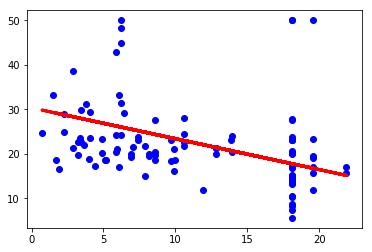

In [11]:
plt.scatter(x_test, Y_test, color='blue')
plt.plot(x_test, Y_predict, color='red', linewidth=3)
plt.show()